## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
merged_data.head(1000)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
995,j365,Zoniferol,Male,24,28,5,46.711261,0
996,j365,Zoniferol,Male,24,28,10,48.349320,0
997,j365,Zoniferol,Male,24,28,15,49.588263,0
998,j365,Zoniferol,Male,24,28,20,50.939353,1


In [8]:
# Checking the number of mice.
len(merged_data['Mouse ID'].unique())

249

In [6]:
!ls

Mouse_metadata.csv
pymaceuticals_starter.ipynb
Study_results.csv
Untitled.ipynb


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], inplace = True)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [10]:
# Checking the number of mice in the clean DataFrame.
len(merged_data['Mouse ID'].unique())

249

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = merged_data.groupby ('Drug Regimen')['Tumor Volume (mm3)']
means = grouped.mean()
medians = grouped.median()
variances = grouped.var()
standard_deviations= grouped.std()
SEM = grouped.sem()
functions_data = pd.DataFrame({'Mean': means, 'Median' : medians, 'Variance': variances, 'Standard Deviation': standard_deviations, 'SEM':SEM})
functions_data
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
table2 = grouped.agg(['mean', 'median', 'var', 'std','sem'])
table2
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

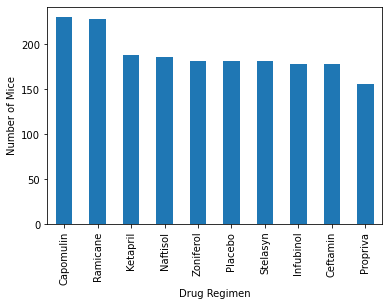

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
counts = merged_data['Drug Regimen'].value_counts()
counts.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

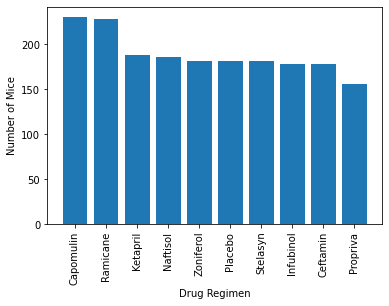

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation = 90)


<AxesSubplot:ylabel='Sex'>

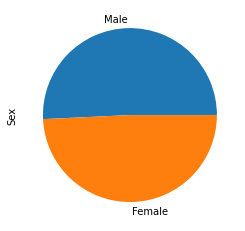

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = merged_data['Sex'].value_counts()
counts.plot(kind = 'pie')


([<matplotlib.patches.Wedge at 0x1f342966f10>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

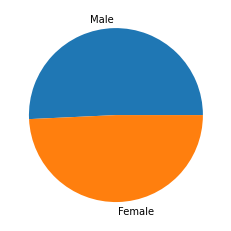

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels = counts.index.values)

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max()
final_timepoint = final_timepoint.reset_index()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_timepoint = final_timepoint.merge(merged_data, on = ['Mouse ID', 'Timepoint'], how = 'inner')

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    final_volume = final_timepoint.loc[final_timepoint['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    final_data.append(final_volume)
    quartiles = final_volume.quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower 
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 *iqr)
    outliers = final_volume.loc[(final_volume<lower_bound)|(final_volume>upper_bound)]
    print (f'outliers for {treatment} are {outliers.values}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

outliers for Capomulin are []
outliers for Ramicane are []
outliers for Infubinol are [36.3213458]
outliers for Ceftamin are []


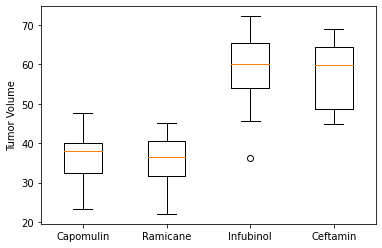

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot (final_data, labels = treatments)
plt.ylabel('Tumor Volume')
plt.show ()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin For s185')

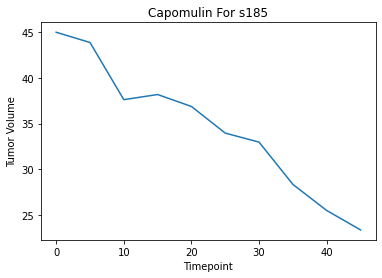

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = merged_data.loc[merged_data['Drug Regimen']=='Capomulin']
one_mouse = Capomulin.loc[Capomulin['Mouse ID']== 's185']
plt.plot(one_mouse['Timepoint'],one_mouse ['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel ('Timepoint')
plt.title ('Capomulin For s185')

In [36]:
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


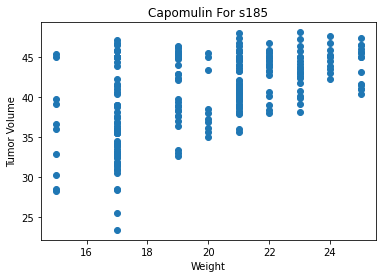

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(Capomulin['Weight (g)'],Capomulin ['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel ('Weight')
plt.title ('Capomulin For s185')
plt.show()

## Correlation and Regression

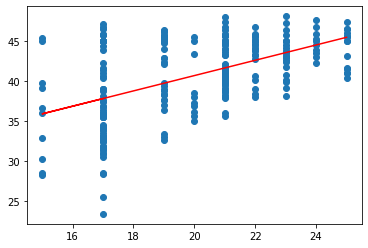

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(Capomulin['Weight (g)'],Capomulin['Tumor Volume (mm3)'])[0],2)
model = st.linregress(Capomulin['Weight (g)'],Capomulin['Tumor Volume (mm3)'])
y_values = Capomulin['Weight (g)']*model[0]+model[1]
plt.scatter(Capomulin['Weight (g)'],Capomulin['Tumor Volume (mm3)'])
plt.plot(Capomulin['Weight (g)'],y_values,color="red")
plt.show()